<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-02-27 10:02:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  41.5MB/s    in 4.8s    

2026-02-27 10:02:54 (42.2 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 151.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 170.8 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 170.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 175.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 181.4 MB/s eta 0:00:00


In [10]:
!pip install seaborn

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [14]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


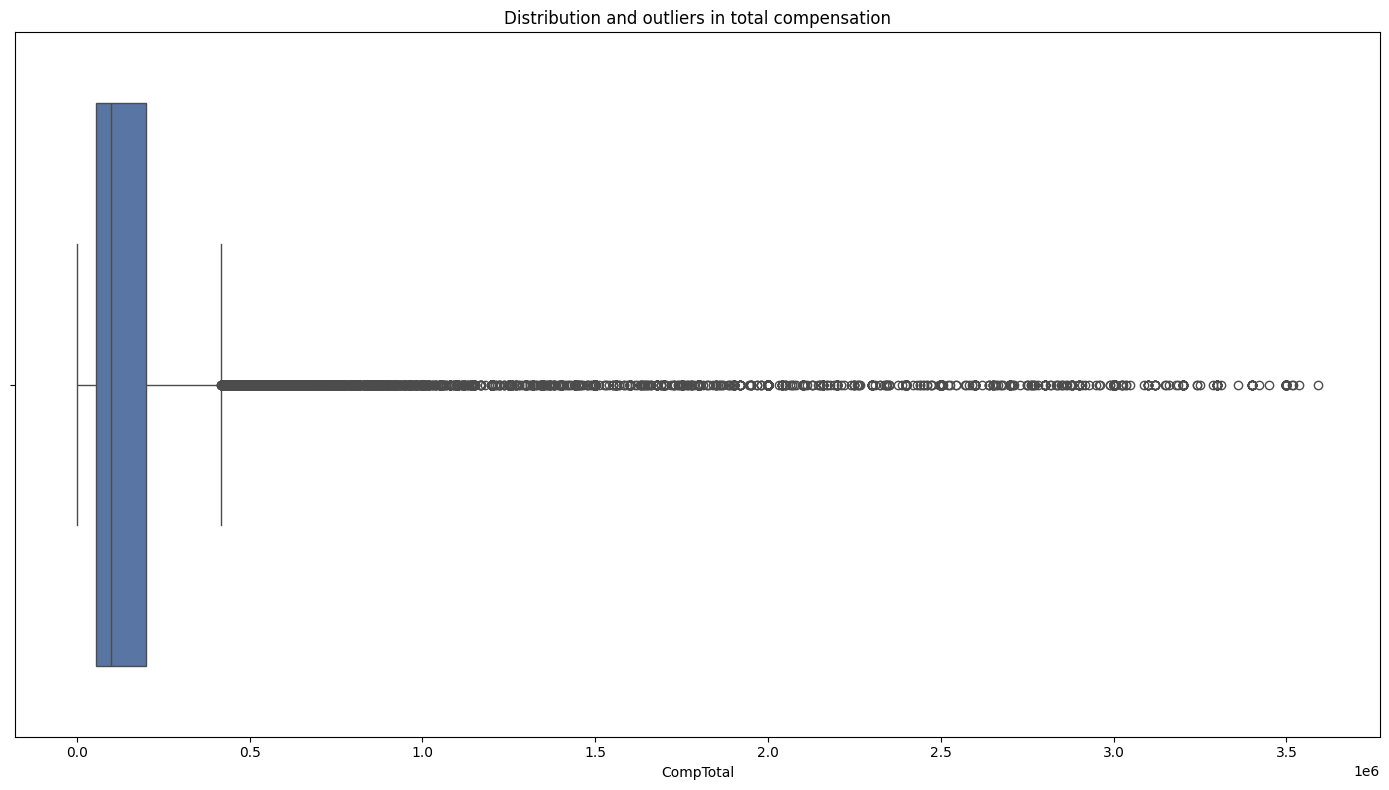

In [21]:
# your code goes here

conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
conn.close()

# Triming top 5% outliers for a readable distribution
df = df[df["CompTotal"] < df["CompTotal"].quantile(0.95)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x= "CompTotal", color="#4C72B0")
plt.title("Distribution and outliers in total compensation")
#plt.xlabel("CompTotal")
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


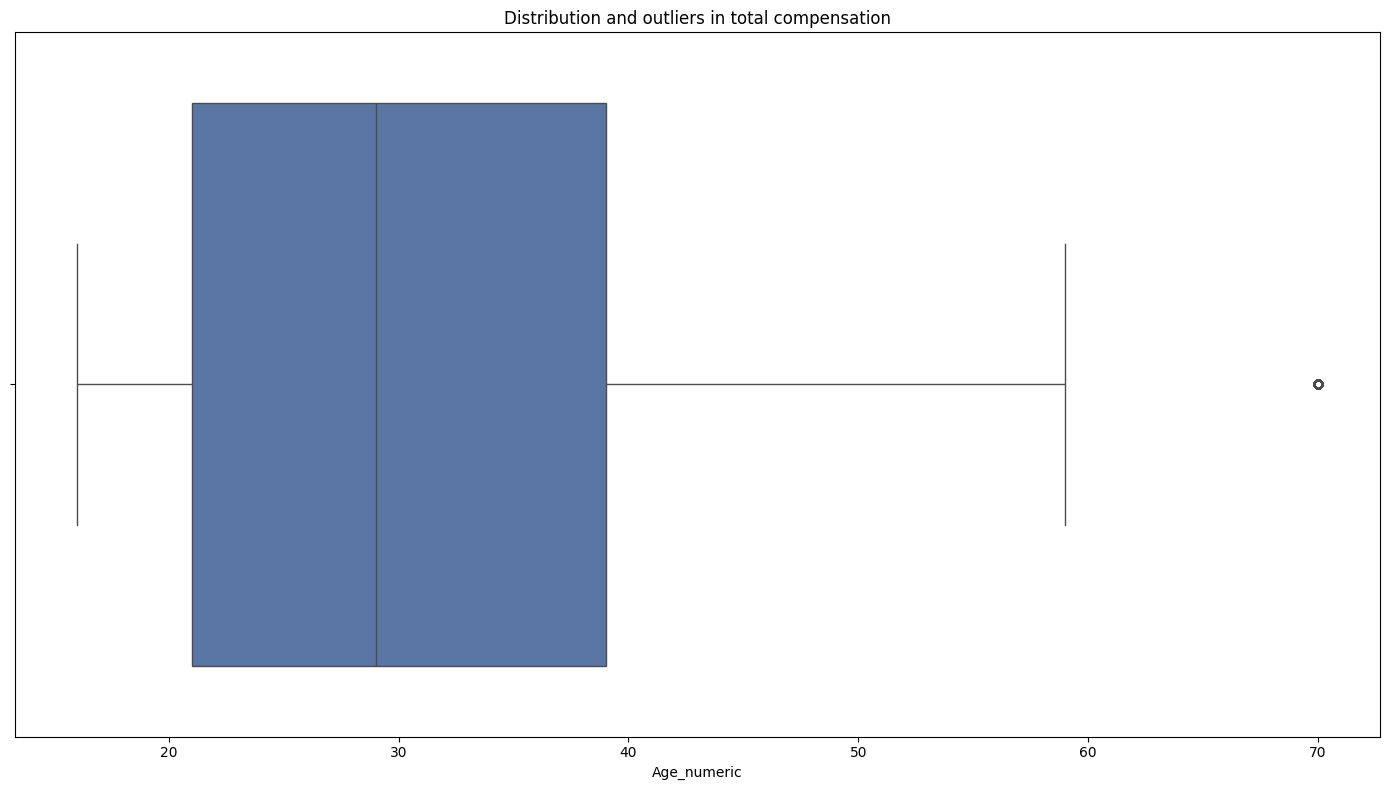

In [22]:
# your code goes here
conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
conn.close()

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
    
df["Age_numeric"] = df["Age"].map(age_mapping)


plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x= "Age_numeric", color="#4C72B0")
plt.title("Distribution and outliers in total compensation")
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


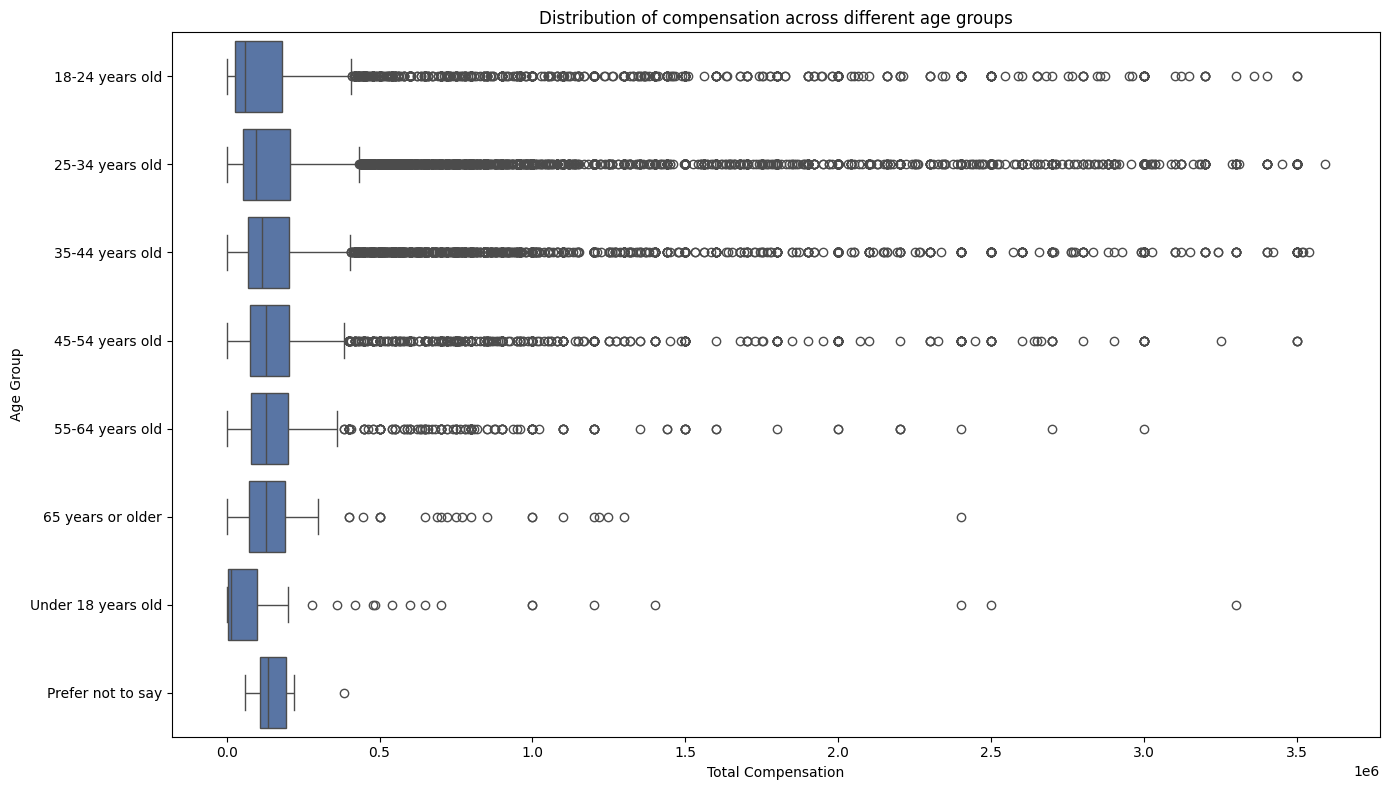

In [24]:
# your code goes here
conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL
AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

df = df[df["CompTotal"] < df["CompTotal"].quantile(0.95)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x= "CompTotal", y = "Age", color="#4C72B0")
plt.title("Distribution of compensation across different age groups")
plt.xlabel("Total Compensation")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [25]:
conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT JobSatPoints_6
FROM main
WHERE JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

df.head

<bound method NDFrame.head of        JobSatPoints_6
0                 0.0
1                25.0
2                30.0
3                 0.0
4                60.0
...               ...
29445             0.0
29446             0.0
29447            60.0
29448             0.0
29449             0.0

[29450 rows x 1 columns]>

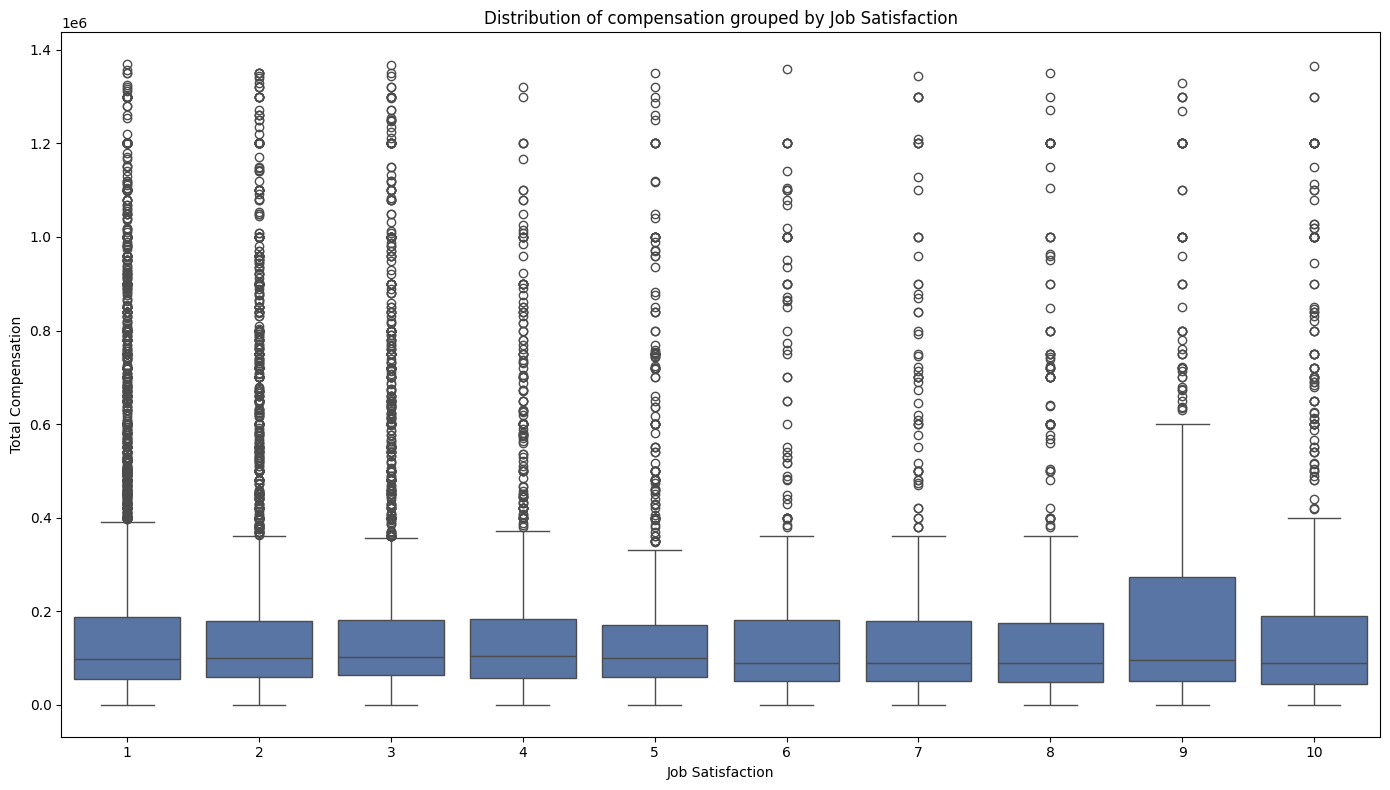

In [29]:
# your code goes here
conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

df = df[df["CompTotal"] < df["CompTotal"].quantile(0.90)]

#Reducing JobSat into 10 bins
df["JobSatPoints_6"] = pd.cut(df["JobSatPoints_6"], bins=10, labels=range(1, 11))

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x= "JobSatPoints_6", y = "CompTotal", color="#4C72B0")
plt.title("Distribution of compensation grouped by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Total Compensation")
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


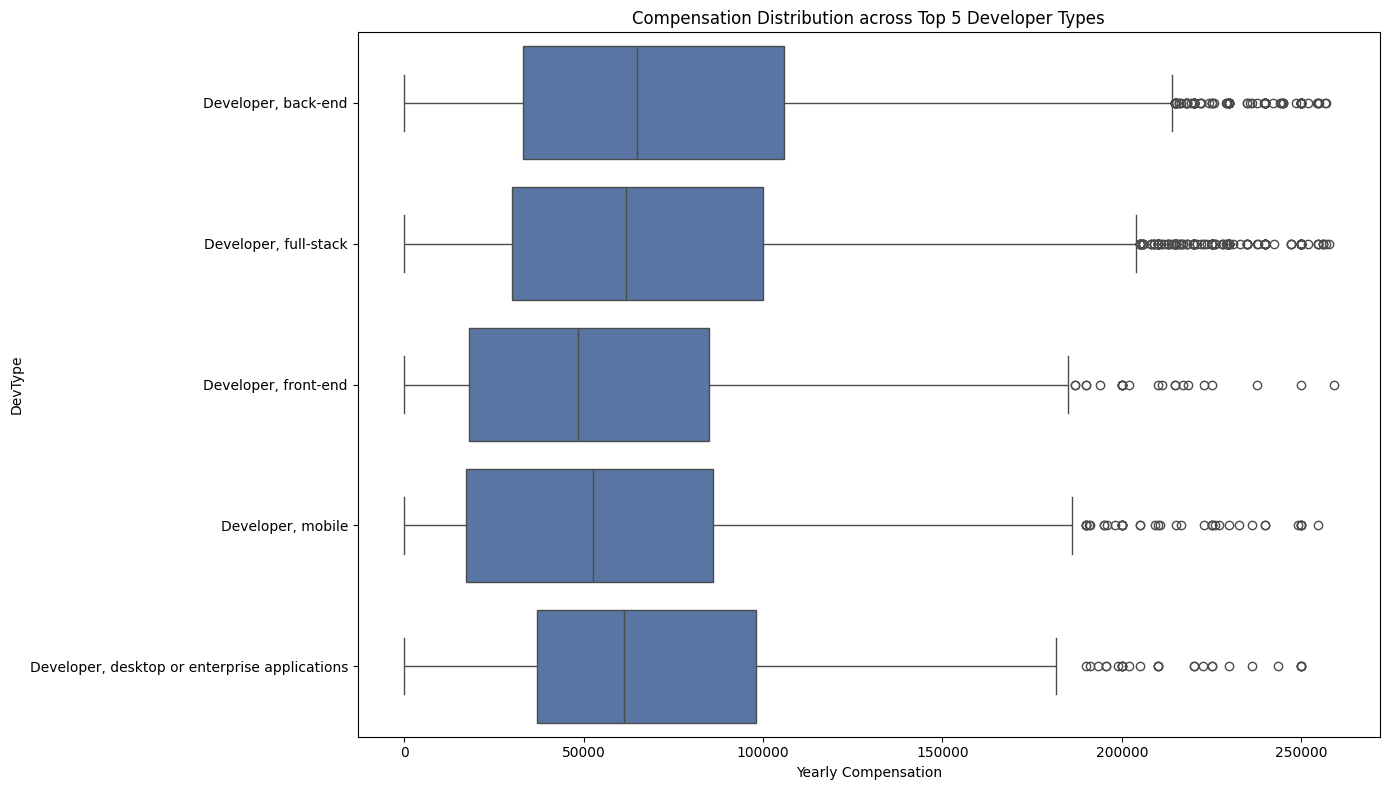

In [35]:
# your code goes here

conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL
AND DevType IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

#df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df = df.dropna(subset=["ConvertedCompYearly"])

#Spliting and explode so each developer type gets its own row
df = df.assign(DevType=df["DevType"].str.split(";")).explode("DevType")
df["DevType"] = df["DevType"].str.strip()

# Get top 5 most frequent developer types
top5 = df["DevType"].value_counts().nlargest(5).index
df = df[df["DevType"].isin(top5)]

df = df[df["ConvertedCompYearly"] < df["ConvertedCompYearly"].quantile(0.98)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x= "ConvertedCompYearly", y = "DevType", color="#4C72B0")
plt.title("Compensation Distribution across Top 5 Developer Types")
plt.xlabel("Yearly Compensation")
plt.ylabel("DevType")
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


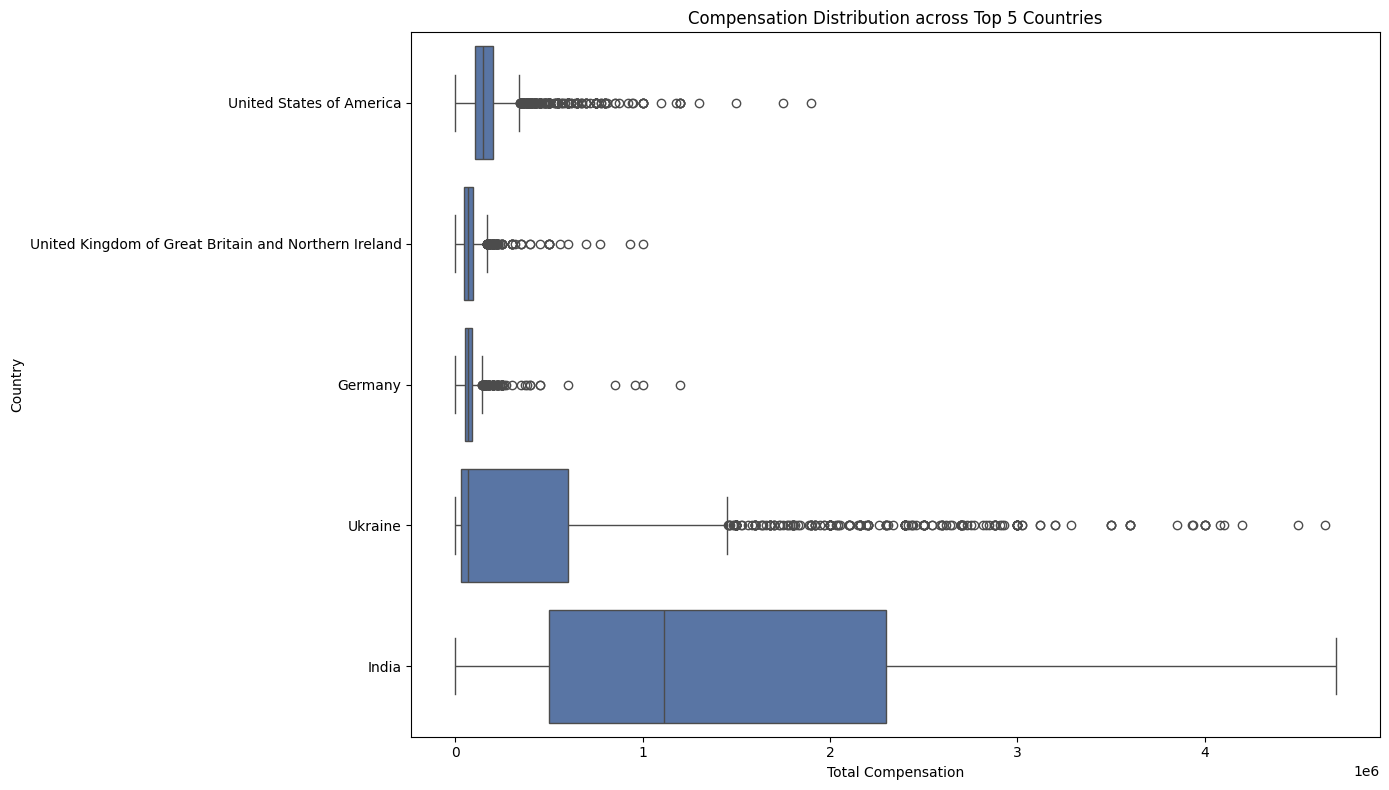

In [37]:
# your code goes here
conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL
AND Country IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
conn.close()

df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

#5 most frequent countries
top5 = df["Country"].value_counts().nlargest(5).index
df = df[df["Country"].isin(top5)]

df = df[df["CompTotal"] < df["CompTotal"].quantile(0.99)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="CompTotal", y="Country", color="#4C72B0")
plt.title("Compensation Distribution across Top 5 Countries")
plt.xlabel("Total Compensation")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_300/1066436911.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


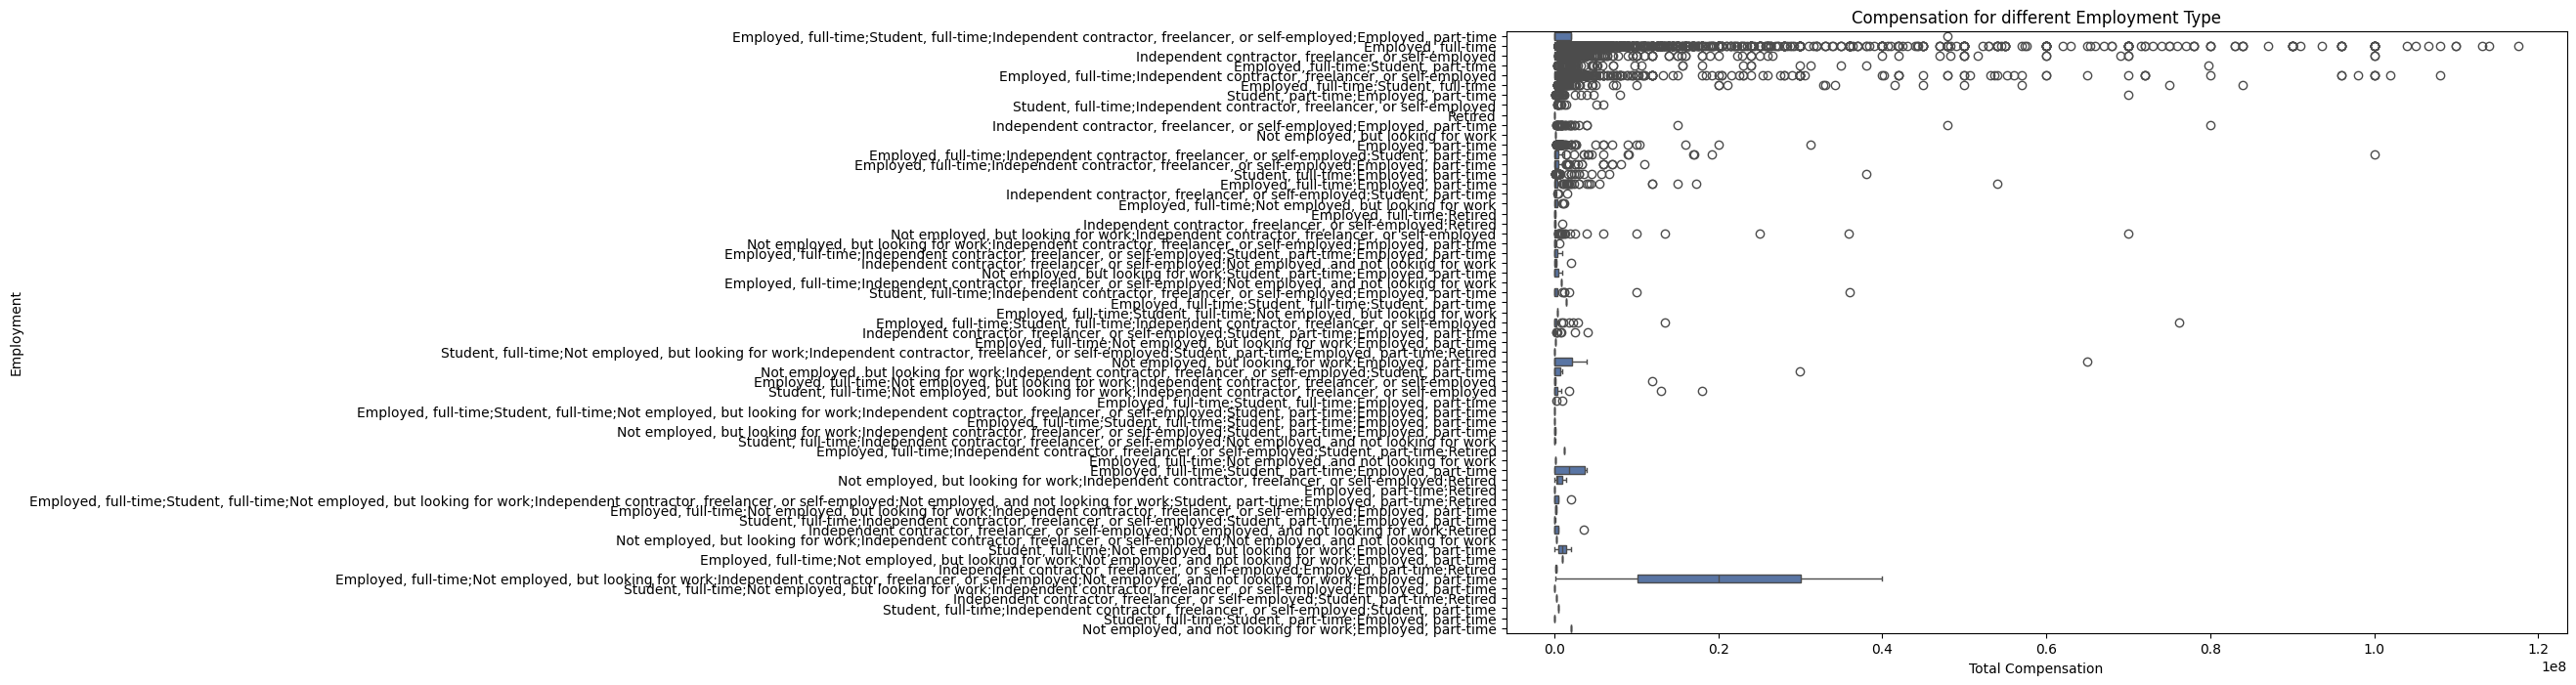

In [38]:
# your code goes here
conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL
AND Employment IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
conn.close()

df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

df = df[df["CompTotal"] < df["CompTotal"].quantile(0.99)]



plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="CompTotal", y="Employment", color="#4C72B0")
plt.title("Compensation for different Employment Type")
plt.xlabel("Total Compensation")
plt.ylabel("Employment")
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [39]:
conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

df.head

<bound method NDFrame.head of       YearsCodePro
0               17
1               27
2                7
3               11
4               25
...            ...
51605            7
51606           24
51607            3
51608            5
51609            2

[51610 rows x 1 columns]>

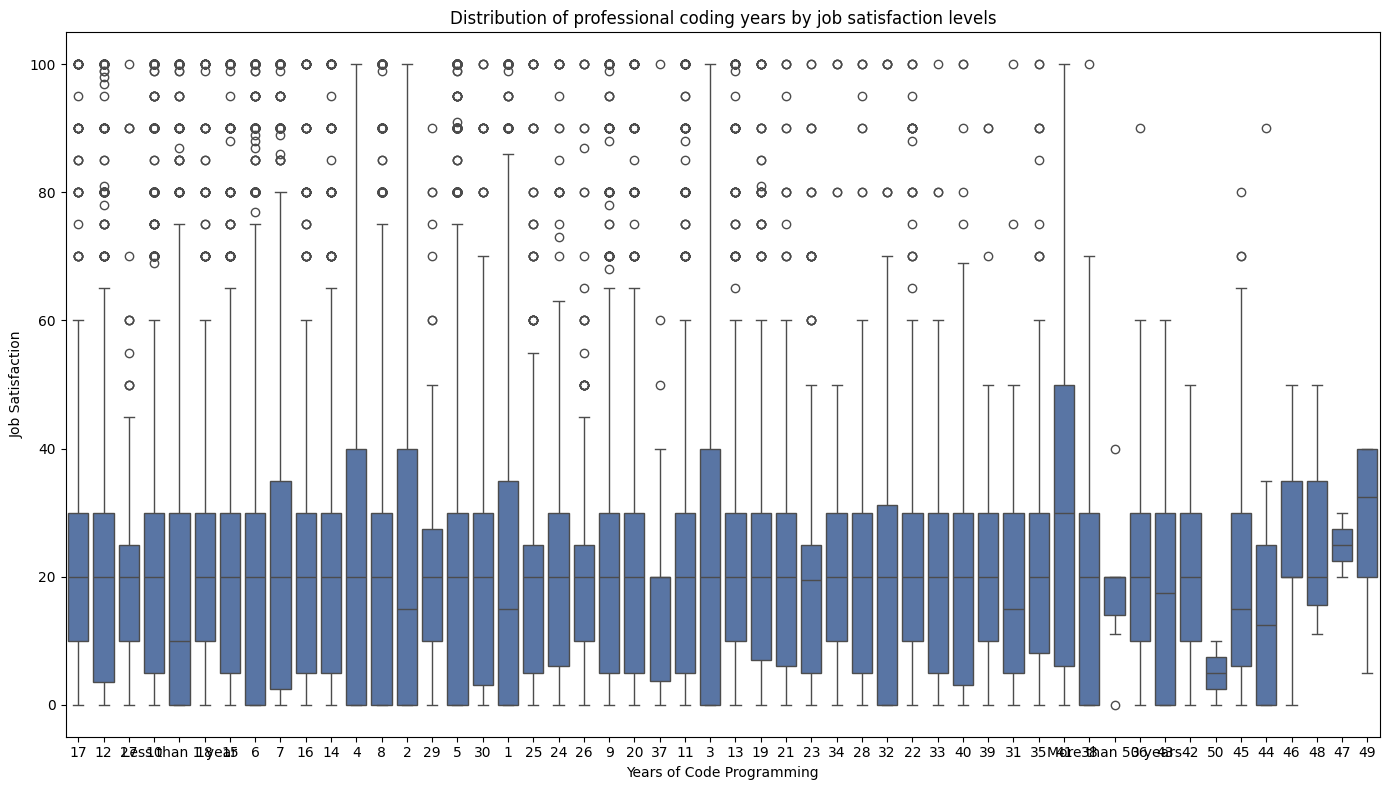

In [42]:
# your code goes here
conn = sqlite3.connect("survey-data.sqlite")

QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
conn.close()


plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="YearsCodePro", y="JobSatPoints_6", color="#4C72B0")
plt.title("Distribution of professional coding years by job satisfaction levels")
plt.xlabel("Years of Code Programming")
plt.ylabel("Job Satisfaction")
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [43]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
